In [3]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
from UoI_Lasso import UoI_Lasso

from ret1_utils import Retina

%matplotlib inline

In [10]:
dataset = fits.create_group('20080516_R1.mat')

In [4]:
retina = Retina(
    data_path='data/20080516_R1.mat',
    random_path='data/ran1.bin'
)

In [12]:
# uoi lasso
uoi_strf, uoi_intercept, uoi_r2s, uoi_bics, uoi_aics = retina.calculate_strf_for_neurons(
    method='UoILasso', 
    recording_idx=0, 
    window_length=0.33,
    cells=2,
    return_scores=True,
    estimation_score='AIC'
)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [15]:
lasso_strf, lasso_intercept, lasso_r2s, lasso_bics, lasso_aics = retina.calculate_strf_for_neurons(
    method='Lasso', 
    recording_idx=0, 
    window_length=0.33,
    cells=2,
    return_scores=True,
)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


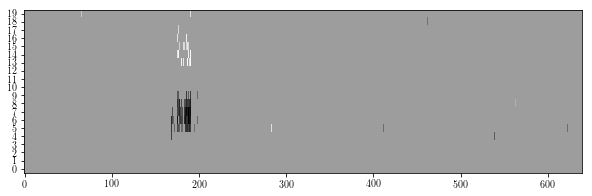

In [14]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.imshow(uoi_strf, cmap='gray')
ax.set_aspect('auto')
ax.set_yticks(np.arange(uoi_strf.shape[0]))
ax.tick_params(labelsize=10)

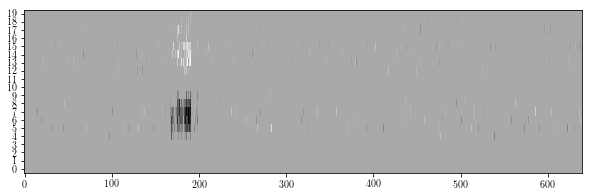

In [16]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.imshow(lasso_strf, cmap='gray')
ax.set_aspect('auto')
ax.set_yticks(np.arange(lasso_strf.shape[0]))
ax.tick_params(labelsize=10)

In [20]:
print(np.count_nonzero(lasso_strf)/lasso_strf.size)
print(np.count_nonzero(uoi_strf)/uoi_strf.size)

0.035625
0.0078125
